Probability and Statistics for Computer Science

##### The goal of this project is to analyze the average number of games a NHL player drafted has played based on the round he was drafted in. Using a dataset of NHL draft picks from 1963-2022, I will categorize the data by type and level of measurement, clean and prepare the data using Python and Pandas, and conduct statistical analysis to determine the probability of success for each draft round. This project aims to provide insights into the success rates of NHL draft picks and inform future draft strategies for teams.



In [1]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt


In [8]:
# df = pd.read_csv('nhldraft.csv')
# df.drop(['id', 'team', 'nationality', 'age', 'to_year', 'amateur_team', 'plus_minus', 'penalties_minutes', 'goalie_games_played', 'goalie_wins', 'goalie_losses', 'goalie_ties_overtime', 'save_percentage', 'goals_against_average'], axis=1, inplace=True)

# df.dropna(inplace=True)
# df
# df[df['overall_pick'] > 30]


### Functions that calculate the average of players in the second round and higher from 1963 to 2021 that have played in the NHL. This is to determine the success of players in each round making it into the NHL.

In [16]:
# #NHL has 32 teams, with the introduction of the seattle krakens
      
# def get_round_stats_2020(df, year, round_num):
#     # Filter the data to only include players from the given year and round
#     round_data = df[df['year'] == year]
#     round_data = round_data[round_data['overall_pick'] >= round_num*31 + 1]
#     round_data = round_data[round_data['overall_pick'] <= (round_num+1)*31]


#     # Get the number of picks and games played
#     num_picks = len(round_data)
#     games_played = round_data['games_played'].sum()

#     # Print the results
#     if num_picks == 1:
#         picks_text = 'pick'
#     else:
#         picks_text = 'picks'
#     if games_played == 1:
#         games_text = 'game'
#     else:
#         games_text = 'games'
        
#     print(f'{year} - Round {round_num}: {num_picks} {picks_text}, {games_played} total {games_text} played')
# def get_round_stats_2019(df, year, round_num):
#     # Filter the data to only include players from the given year and round
#     round_data = df[df['year'] == year]
#     round_data = round_data[round_data['overall_pick'] >= round_num*31 + 1]
#     round_data = round_data[round_data['overall_pick'] <= (round_num+1)*31]


#     # Get the number of picks and games played
#     num_picks = len(round_data)
#     games_played = round_data['games_played'].sum()

#     # Print the results
#     if num_picks == 1:
#         picks_text = 'pick'
#     else:
#         picks_text = 'picks'
#     if games_played == 1:
#         games_text = 'game'
#     else:
#         games_text = 'gabmes'
        
#     print(f'{year} - Round {round_num}: {num_picks} {picks_text}, {games_played} total {games_text} played')
# for round_num in range(1, 7):
#     get_round_stats_2020(df,2020,round_num)

2020 - Round 1: 2 picks, 10.0 total games played
2020 - Round 2: 1 pick, 25.0 total games played
2020 - Round 3: 0 picks, 0.0 total games played
2020 - Round 4: 1 pick, 4.0 total games played
2020 - Round 5: 1 pick, 1.0 total game played
2020 - Round 6: 1 pick, 5.0 total games played


In [2]:
df = pd.read_csv('nhldraft.csv')

df.drop(['id','goals','position','points','assists','point_shares', 'team', 'nationality', 'age', 'to_year', 'amateur_team', 'plus_minus', 'penalties_minutes', 'goalie_games_played', 'goalie_wins', 'goalie_losses', 'goalie_ties_overtime', 'save_percentage', 'goals_against_average'], axis=1, inplace=True)


teams_by_year = {
    1963: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins'],
    1964: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins'],
    1965: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins'],
    1966: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins'],
    1967: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Oakland Seals'],
    1968: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Oakland Seals'],
    1969: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Oakland Seals'],
    1970: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres'],
    1971: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres'],
    1972: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders'],
    1973: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders'],
    1974: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Kansas City Scouts','Washington Capitals'],
    1975: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Kansas City Scouts','Washington Capitals'],
    1976: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Cleveland Barons','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Colorado Rockies','Washington Capitals'],
    1977: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Cleveland Barons','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Colorado Rockies','Washington Capitals'],
    1978: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Colorado Rockies','Washington Capitals'],
    1979: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Colorado Rockies','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers'],
    1980: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Colorado Rockies','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','Calgary Flame'],
    1981: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Colorado Rockies','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','Calgary Flame'],
    1982: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1983: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1984: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1985: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1986: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1987: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1988: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1989: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1990: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1991: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1992: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Calgary Flame'],
    1993: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Calgary Flame'],
    1994: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Calgary Flame'],
    1995: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Calgary Flame'],
    1996: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Phoenix Coyotes','Calgary Flame'],
    1997: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Phoenix Coyotes','Calgary Flame'],
    1998: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins''Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Phoenix Coyotes','Calgary Flame'],
    1999: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Phoenix Coyotes','Calgary Flame'],
    2000: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes''Minnesota Wild'],
    2001: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2002: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2003: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2004: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2005: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2006: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2007: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2008: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2009: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2010: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2011: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2012: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2013: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2014: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2015: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2016: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2017: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild','Vegas Golden Knights'],
    2018: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild','Vegas Golden Knights'],
    2019: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild','Vegas Golden Knights'],
    2020: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild','Vegas Golden Knights'],
    2021: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild','Vegas Golden Knights'],



    




    

}
rounds_by_year = {
    1963: 4,
    1964: 4,
    1965: 2,
    1966: 4,
    1967: 3,
    1968: 3,
    1969: 10,
    1970: 14,
    1971: 15,
    1972: 11,
    1973: 12,
    1974: 25,
    1975: 18,
    1976: 15,
    1977: 17,
    1978: 22,
    1979: 6,
    1980: 10,
    1981: 11,
    1982: 12,
    1983: 12,
    1984: 12,
    1985: 12,
    1986: 12,
    1987: 12,
    1988: 12,
    1989: 12,
    1990: 12,
    1991: 12,
    1992: 11,
    1993: 11,
    1994: 11,
    1995: 9,
    1996: 9,
    1997: 9,
    1998: 9,
    1999: 9,
    2000: 9,
    2001: 9,
    2002: 9,
    2003: 9,
    2004: 9,
    2005: 7,
    2006: 7,
    2007: 7,
    2008: 7,
    2009: 7,
    2010: 7,
    2011: 7,
    2012: 7,
    2013: 7,
    2014: 7,
    2015: 7,
    2016: 7,
    2017: 7,
    2018: 7,
    2019: 7,
    2020: 7,
    2021: 7,
    2022: 7
        
}
def get_round(years, overall_picks, teams_by_year, rounds_by_year):
    rounds = []
    for year, overall_pick in zip(years, overall_picks):
        if year not in teams_by_year or year not in rounds_by_year:
            rounds.append(None)
            continue
        num_teams = len(teams_by_year[year])
        round_num = int((overall_pick) // num_teams)
        if round_num > rounds_by_year[year]:
            rounds.append(None)
        else:
            rounds.append(round_num)
    return rounds

print(df.columns)

Index(['year', 'overall_pick', 'player', 'games_played'], dtype='object')


In [3]:
df['rounds'] = get_round(df['year'].tolist(), df['overall_pick'].tolist(), teams_by_year, rounds_by_year)
df.dropna(inplace=True)
df = df.loc[df['rounds'] > 1]

df

,year,overall_pick,player,games_played,rounds
283,2021,60,Janis Moser,43.0,2.0
530,2020,84,Nicolas Daws,25.0,2.0
587,2020,141,Isaak Phillips,4.0,4.0
627,2020,181,Cole Reinhardt,1.0,6.0
647,2020,201,Adam Raska,5.0,6.0
...,...,...,...,...,...
12225,1964,21,Syl Apps,727.0,3.0
12226,1964,22,Moe L'Abbe,5.0,3.0
12227,1964,23,Jim Dorey,232.0,3.0
12245,1963,17,Jim McKenny,604.0,2.0


In [4]:
def get_play_probabilities(df, num_of_games=1):
    probabilities = []
    for round_num in range(2, int(df['rounds'].max()+1)):    
        ##for each round we're going to truncate the df so it returns only the data for that round.
        round_df = df.loc[df['rounds'] == round_num]
        enough_games_df = round_df.loc[df['games_played'] >= num_of_games]
        total_round_players = len(round_df)
        enough_games_players = len(enough_games_df)
        enough_games_liklihood = float(enough_games_players) / total_round_players
        probabilities.append((round_num, round(enough_games_liklihood, 2)))
    return probabilities
        
def get_average_games(df):
    averages = []
    for round_num in range(2, int(df['rounds'].max()+1)): 
        round_df = df.loc[df['rounds'] == round_num]
        round_avg = mean( round_df['games_played'].tolist() )
        averages.append((round_num, round( round_avg,2)))
    return averages
        
        
    

In [5]:
probability_df = pd.DataFrame(get_play_probabilities(df, num_of_games=25), columns = ['Round','Probability'])
probability_df

,Round,Probability
0,2,0.73
1,3,0.71
2,4,0.70
3,5,0.72
4,6,0.62
5,7,0.65
6,8,0.62
7,9,0.65
8,10,0.58
9,11,0.68


In [105]:
average_df = pd.DataFrame(get_average_games(df),columns = ['Round','Averages'])
average_df

,Round,Averages
0,2,261.95
1,3,246.82
2,4,195.02
3,5,253.95
4,6,211.64
5,7,216.73
6,8,226.45
7,9,212.88
8,10,192.34
9,11,230.95


Graphs for the functions

Text(0.5, 1.0, 'Average Games Played by Draft Round')

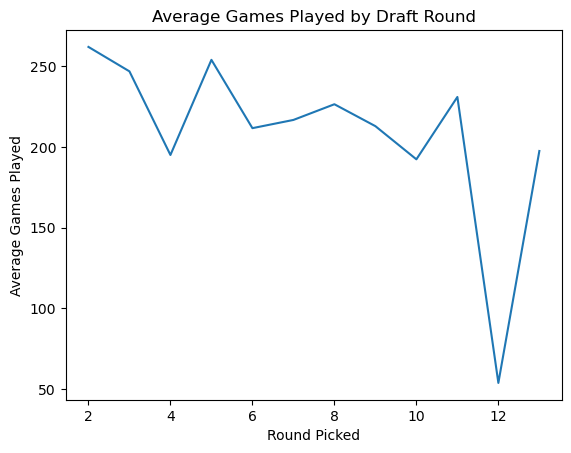

In [8]:
averages = get_average_games(df)
x = [item[0] for item in averages]
y = [item[1] for item in averages]

plt.plot(x,y)
plt.xlabel('Round Picked')
plt.ylabel('Average Games Played')
plt.title('Average Games Played by Draft Round')